In [1]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

AGEs.csv
SpecAnalysis
Untitled.ipynb
add_label.py
ages.ipynb
ann.ipynb
imodpoly_raman_spectroscopy
logs
matlab_raman_preprocessed
matlab_raman_preprocessed copy
matlab_raman_preprocessed copy.zip
original_raman_spectroscopy
papers
pca_kernel.ipynb
pca_svm.ipynb
plolyfit_ann-jvsc-7aedbb54-b08c-4e56-b67b-12dd5e91cff2.ipynb
plolyfit_ann.ipynb
plot
polyfit_old.ipynb
raman-spectroscopy-project.ipynb
scaling.py
transform.py
visualize.ipynb


In [3]:
earData = pd.read_csv('matlab_raman_preprocessed/earData.csv', header=None)

In [4]:
earData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.109544,0.177142,0.173623,0.177176,0.159734,0.158000,0.184051,0.212126,0.235951,0.257984,...,0.150978,0.140330,0.129085,0.133745,0.144209,0.151986,0.148357,0.137125,0.133958,0.130459
1,0.109258,0.172885,0.214020,0.230669,0.218450,0.203159,0.187297,0.165474,0.153201,0.150318,...,0.109427,0.095534,0.090051,0.095128,0.104937,0.116737,0.121955,0.121972,0.110710,0.105519
2,0.159032,0.193393,0.241094,0.251157,0.235980,0.220931,0.201956,0.177007,0.169146,0.178073,...,0.220392,0.194950,0.141888,0.112889,0.114863,0.150639,0.167150,0.170507,0.177817,0.096202
3,0.109713,0.252363,0.344986,0.393723,0.386904,0.374401,0.362303,0.332895,0.312926,0.309658,...,0.128899,0.133675,0.133446,0.148109,0.158930,0.156108,0.164606,0.179078,0.168005,0.183535
4,0.211333,0.163690,0.204773,0.203962,0.203862,0.201805,0.181100,0.148794,0.129302,0.129738,...,0.221735,0.213258,0.172450,0.180123,0.198990,0.203952,0.196866,0.187679,0.158373,0.143136
5,0.252473,0.188353,0.176637,0.175877,0.203836,0.222344,0.223300,0.225091,0.221946,0.211098,...,0.243996,0.235657,0.228041,0.244239,0.261272,0.266504,0.271040,0.271376,0.243151,0.229599
6,0.114963,0.175076,0.263018,0.293772,0.289066,0.283492,0.269648,0.241222,0.232389,0.234764,...,0.075630,0.077231,0.081783,0.082705,0.095873,0.129907,0.142544,0.144089,0.157100,0.106796
7,0.098379,0.173794,0.200085,0.205887,0.175925,0.147036,0.126315,0.107499,0.104454,0.117525,...,0.062789,0.053242,0.059958,0.063803,0.066287,0.069812,0.077633,0.084982,0.088060,0.117709
8,0.140249,0.226689,0.283303,0.314156,0.312689,0.314318,0.322694,0.318643,0.316330,0.316547,...,0.188111,0.188490,0.189466,0.172862,0.167738,0.192059,0.203983,0.209999,0.232156,0.201431
9,0.121780,0.219225,0.275863,0.294363,0.266279,0.242153,0.226838,0.206323,0.203996,0.218647,...,0.139240,0.108594,0.079041,0.063943,0.068680,0.097074,0.116187,0.126307,0.132221,0.094565


In [5]:
earData = earData.to_numpy()

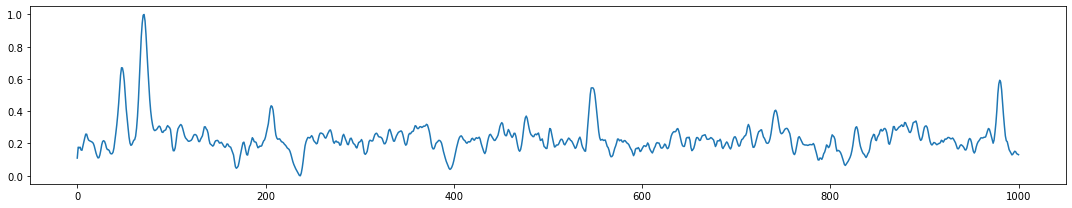

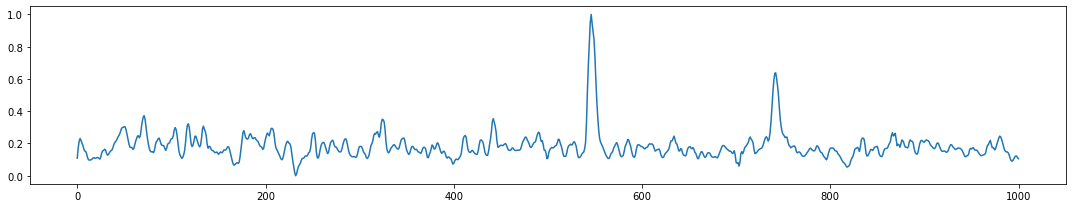

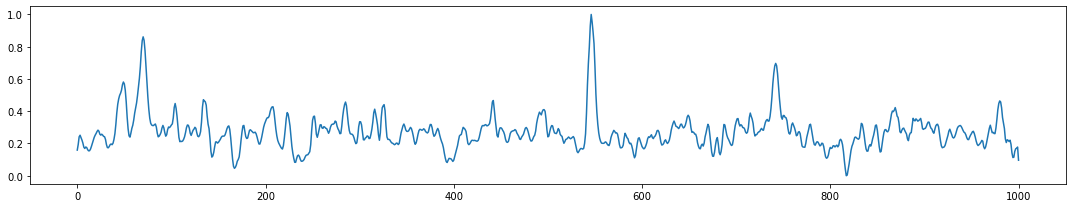

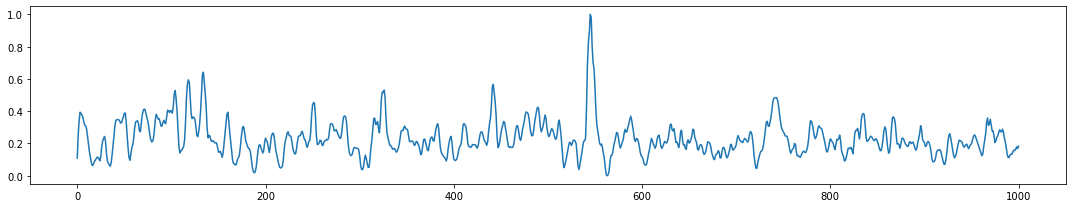

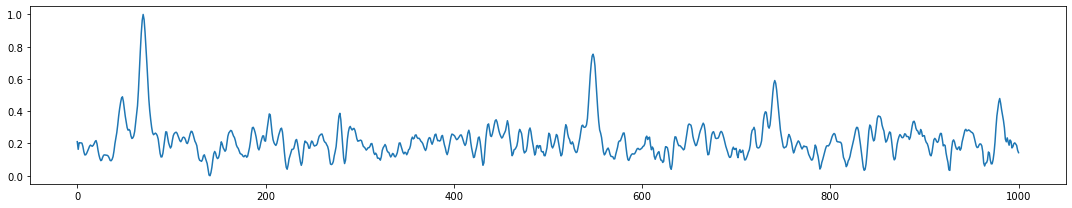

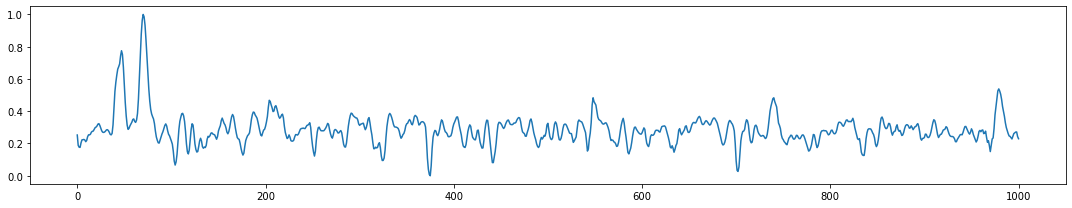

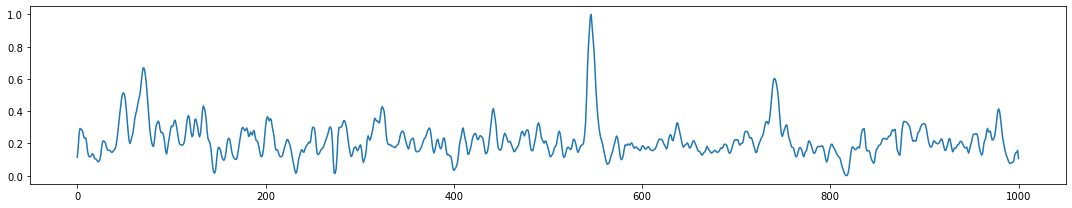

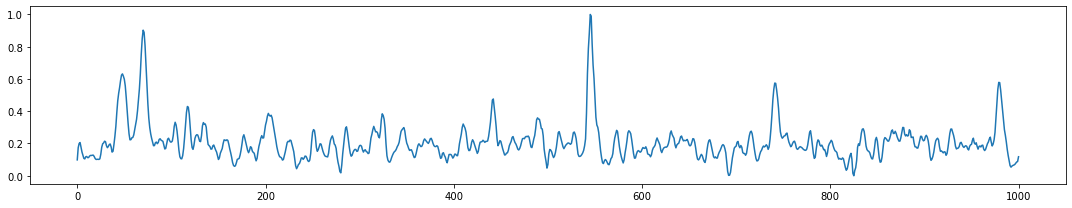

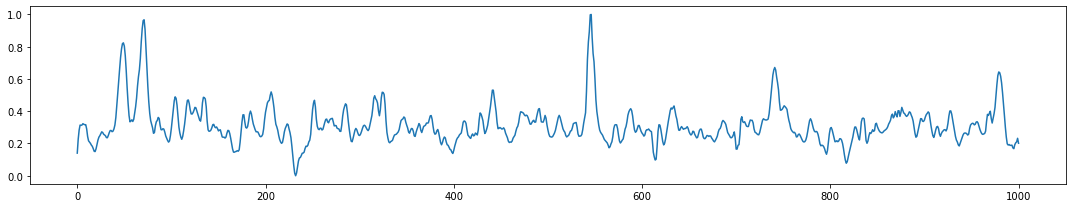

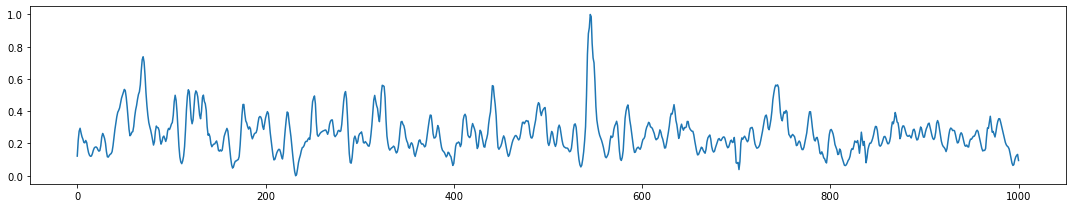

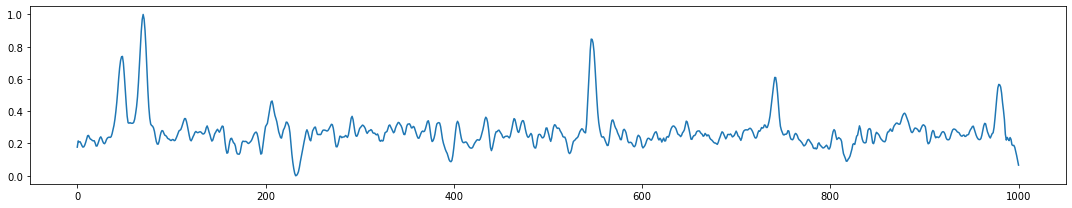

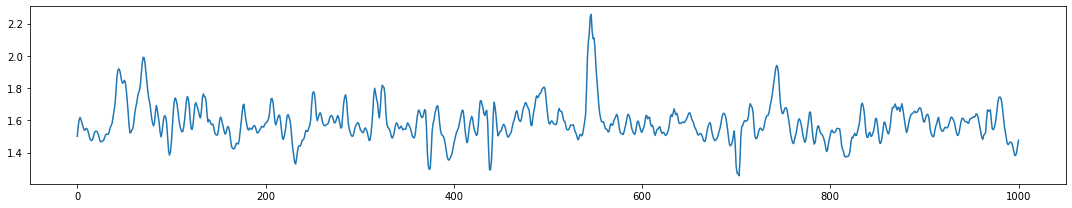

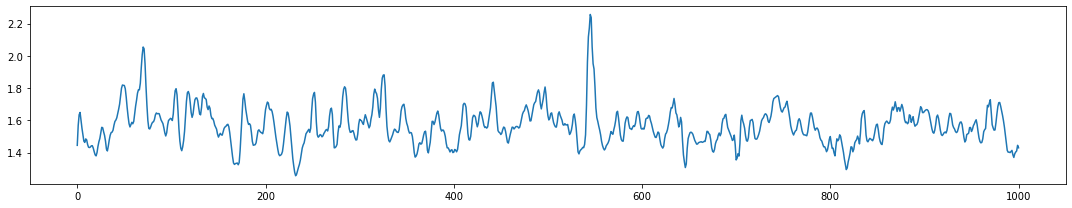

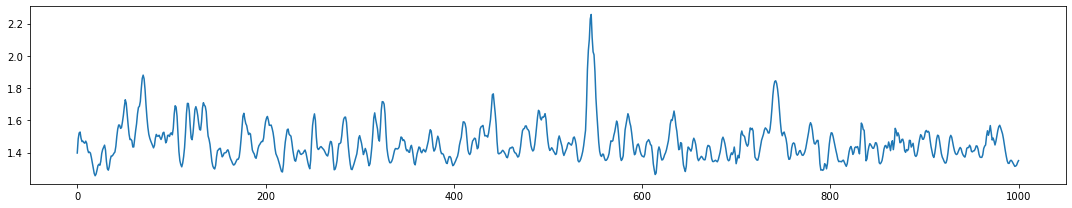

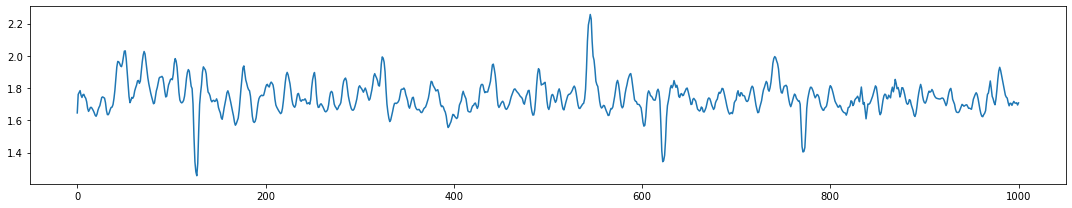

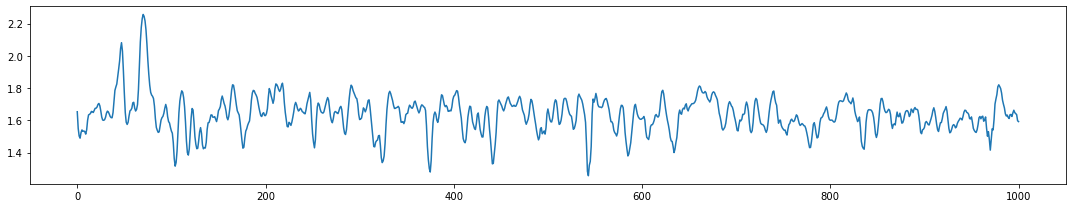

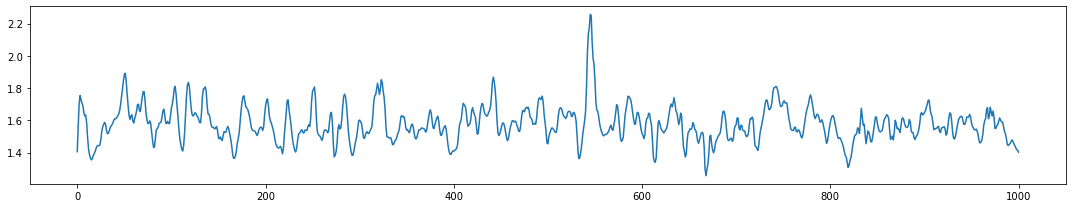

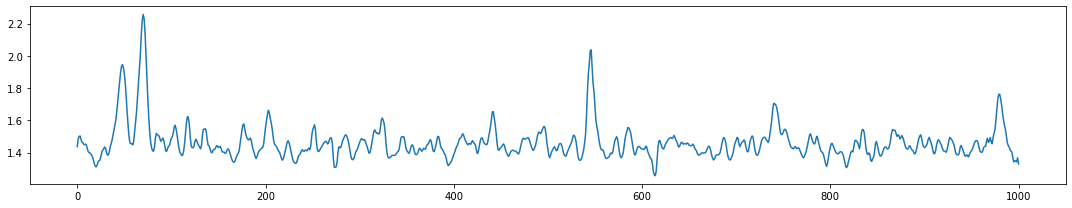

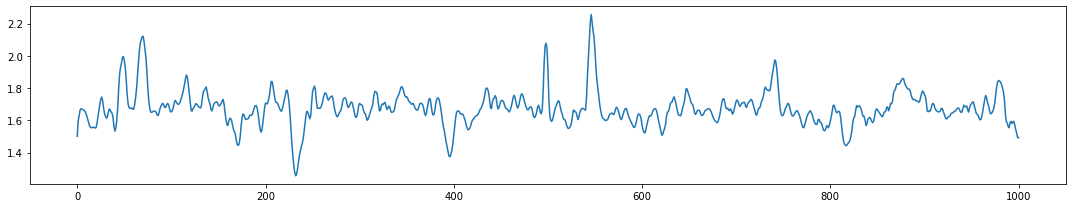

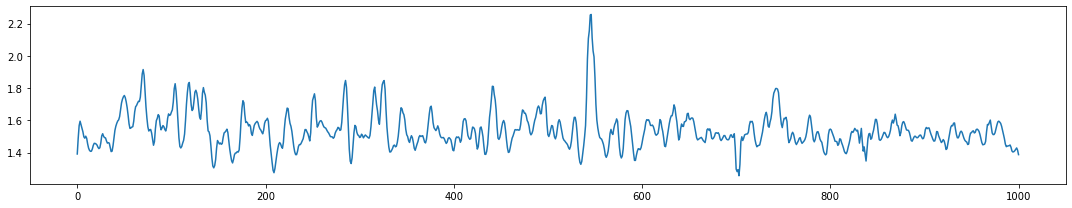

In [6]:
for observation in earData:
    plt.figure(figsize=(15,3))
    plt.plot(observation)

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve

In [8]:
pca = PCA(n_components=2)

In [9]:
pca.fit(earData)

PCA(n_components=2)

In [10]:
X_pca = pca.fit_transform(earData)

In [11]:
X_pca

array([[-19.47359101,   1.12277456],
       [-20.97782866,  -0.68124027],
       [-18.20289181,  -0.43657637],
       [-19.4428924 ,  -1.54939981],
       [-19.97286882,   1.50279591],
       [-17.77567368,   2.96436979],
       [-19.82350823,  -0.77836412],
       [-20.25363113,  -0.51132297],
       [-16.87762244,  -0.6253074 ],
       [-18.56336952,  -1.64707322],
       [-18.24436433,   1.0387111 ],
       [ 23.394356  ,  -0.25683888],
       [ 22.79808869,  -1.14985372],
       [ 19.41785384,  -1.26455426],
       [ 28.40411098,  -0.29669586],
       [ 24.89797004,   4.40424086],
       [ 23.15469515,  -1.39643651],
       [ 19.43804021,   0.19366839],
       [ 26.20791353,   0.51518725],
       [ 21.89521359,  -1.14808446]])

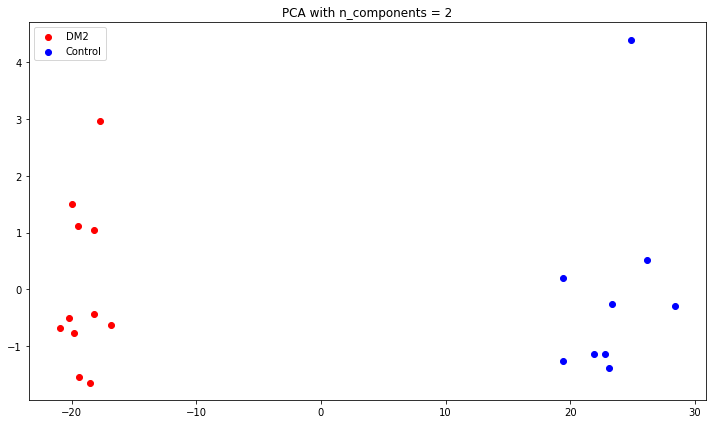

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0][:11], X_pca[:, 1][:11], c='red')
plt.scatter(X_pca[:, 0][11:], X_pca[:, 1][11:], c='blue')
plt.legend(['DM2', 'Control'], loc="upper left")
plt.title('PCA with n_components = 2')
plt.savefig('plot/pca_2.pdf', bbox_inches='tight')
plt.show()

In [13]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']
target

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: has_DM2, dtype: float64

In [14]:
from sklearn.model_selection import KFold, StratifiedKFold

In [15]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [16]:
for train, test in kf.split(X_pca):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] [ 0 17]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] [ 1 15]
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19] [5 8]
[ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 3 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] [16 18]
[ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [ 2 13]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18] [ 9 19]
[ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 4 12]
[ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19] [ 7 10]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19] [ 6 14]


In [17]:
scores = []
best_svc = SVC(kernel='rbf', probability=True)
for train_index, test_index in kf.split(X_pca):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_pca[train_index], X_pca[test_index], target[train_index], target[test_index]
    best_svc.fit(X_train, y_train)
    scores.append(best_svc.score(X_test, y_test))

Train Index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19] 

Test Index:  [ 0 17]
Train Index:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] 

Test Index:  [ 1 15]
Train Index:  [ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19] 

Test Index:  [5 8]
Train Index:  [ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] 

Test Index:  [ 3 11]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] 

Test Index:  [16 18]
Train Index:  [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] 

Test Index:  [ 2 13]
Train Index:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18] 

Test Index:  [ 9 19]
Train Index:  [ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19] 

Test Index:  [ 4 12]
Train Index:  [ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19] 

Test Index:  [ 7 10]
Train Index:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19] 

Test Index:  [ 6 14]


In [18]:
scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [19]:
best_svc.support_vectors_

array([[ 19.41785384,  -1.26455426],
       [ 24.89797004,   4.40424086],
       [-20.97782866,  -0.68124027],
       [-17.77567368,   2.96436979],
       [-16.87762244,  -0.6253074 ]])

In [20]:
roc_auc_score(target, best_svc.predict_proba(X_pca)[:, 1])

# roc_auc_score(target, best_svc.decision_function(X_pca))

1.0

FOLD 1 Test set
y_test : [1. 1.] 

FOLD 2 Test set
y_test : [1. 0.] 

FOLD 3 Test set
y_test : [1. 0.] 

FOLD 4 Test set
y_test : [1. 0.] 

FOLD 5 Test set
y_test : [1. 0.] 

FOLD 6 Test set
y_test : [1. 0.] 

FOLD 7 Test set
y_test : [1. 0.] 

FOLD 8 Test set
y_test : [1. 0.] 

FOLD 9 Test set
y_test : [1. 0.] 

FOLD 10 Test set
y_test : [1. 0.] 



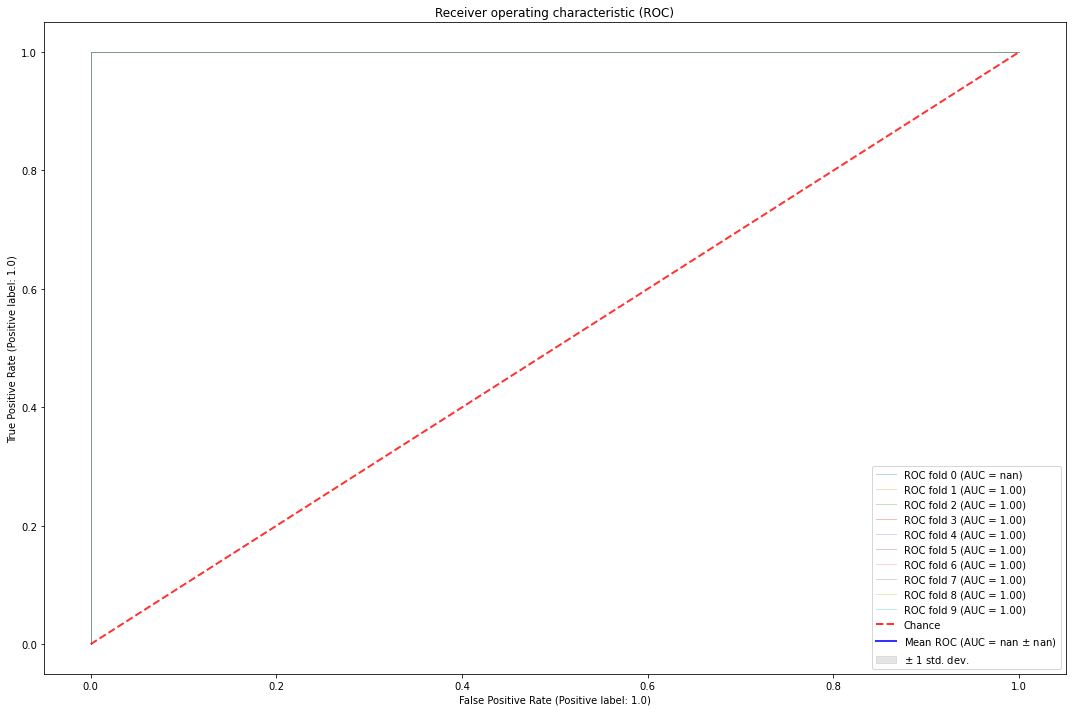

In [25]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = SVC(kernel='rbf', probability=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

X = X_pca
y = target

fig, ax = plt.subplots(figsize=(15,10))
for i, (train, test) in enumerate(cv.split(X, y)):
    print(f'FOLD {i+1} Test set')
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    print(f'y_test : {classifier.predict(X[test])} \n')

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic (ROC)")
ax.legend(loc="lower right")
plt.savefig('plot/experiments/stratified_kf.pdf')
plt.show()

In [22]:
mean_tpr

array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1.])

In [216]:
from sklearn.metrics import classification_report

print(classification_report(target, best_svc.predict(X_pca)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [213]:
best_svc.predict_proba(X_pca)[:, 1]

array([0.91874909, 0.91617544, 0.91819224, 0.91676778, 0.9181801 ,
       0.91630441, 0.9176802 , 0.91751594, 0.91620696, 0.91665464,
       0.91871389, 0.09503379, 0.09605851, 0.10156317, 0.11250362,
       0.10159539, 0.09673524, 0.0995899 , 0.10085946, 0.09622283])

In [218]:
np.linspace(0, 1, 100)


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747